<h1>Investigate securities properties</h1>

<h3>Pandas profiler</h3>

In [1]:
# the installation take few minutes - 
# it is recommended running it on a clean notebook with only pandas imported and the dataset read.
# when using matplotlib inline there could be some problems and errors

# pip install -U pandas-profiling[notebook]
# jupyter nbextension enable --py widgetsnbextension

<h3>Imports</h3>

In [2]:
import pandas_profiling
from pandas_profiling import ProfileReport

<h3>Installations</h3>

In [3]:
# !pip install yfinance

<h3>More Imports</h3>

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# inline plot 
%matplotlib inline  

In [5]:
import warnings
warnings.filterwarnings('ignore')

<h3>Read files</h3>

In [6]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [7]:
data_folder = "../DataRaw/"
data_out    = "../DataWork/"

# dat_fname = data_out + "yahoo_download_2022_02_19.csv"
dat_fname = data_out + "yahoo_download_" + pd.to_datetime('today').strftime('%Y_%m_%d') + ".csv"

In [8]:
assets = pd.read_csv(data_folder + "M6_Universe.csv", index_col=0)
symbols = assets.symbol.to_list()

In [9]:
assets.shape

(100, 5)

In [10]:
dat = pd.read_csv(dat_fname,header=[0,1],index_col=0)

In [11]:
dat.head()

Adj Close                                                       \
                ABBV        ACN        AEP        AIZ ALLE       AMAT AMP   
Date                                                                        
2004-12-31       NaN  19.976091  17.274654  22.410946  NaN  12.820436 NaN   
2005-01-03       NaN  19.509987  17.113684  22.520985  NaN  12.610504 NaN   
2005-01-04       NaN  19.051273  17.048288  22.080837  NaN  12.370594 NaN   
2005-01-05       NaN  18.977295  16.847065  21.897440  NaN  12.160666 NaN   
2005-01-06       NaN  18.807127  16.852093  22.447630  NaN  12.070700 NaN   

                                                                             \
                 AMZN        AVB        AVY        AXP        BDX      BF-B   
Date                                                                          
2004-12-31  44.290001  40.959309  38.327103  37.977417  42.906303  7.409596   
2005-01-03  44.520000  40.469757  37.815807  37.667515  42.309551  7.313700   
2005-01-04  42.139999  40.018269  37.291748  37.101597  41.818546  7.269560   
2005-01-05  41.770000  38.087261  36.831596  36.757252  41.584354  7.292395   
2005-01-06  41.049999  38.701920  37.272568  36.568192  41.591919  7.301525   

                                                                          \
                  BMY  BR CARR CDW  CE CHTR     CNC       CNP        COP   
Date                                                                       
2004-12-31  13.436498 NaN  NaN NaN NaN  NaN  7.0875  5.479974  19.128227   
2005-01-03  13.336850 NaN  NaN NaN NaN  NaN  7.1675  5.363586  18.529024   
2005-01-04  13.190001 NaN  NaN NaN NaN  NaN  7.0750  5.310239  18.407858   
2005-01-05  13.147580 NaN  NaN NaN NaN  NaN  6.9600  5.213249  18.544437   
2005-01-06  13.126366 NaN  NaN NaN NaN  NaN  7.0000  5.218099  18.813198   

                                                                         \
                 CTAS CZR  DG       DPZ        DRE        DXC       EWA   
Date                                                                      
2004-12-31  34.254078 NaN NaN  8.428116  14.990513  17.250200  7.747336   
2005-01-03  33.707382 NaN NaN  8.300275  14.753404  17.008446  7.640637   
2005-01-04  33.230988 NaN NaN  8.333417  14.568987  16.696310  7.506101   
2005-01-05  33.145073 NaN NaN  8.248191  14.050861  16.622864  7.533936   
2005-01-06  33.465275 NaN NaN  8.167699  14.050861  16.503517  7.547852   

                                                                             \
                  EWC        EWG       EWH        EWJ        EWL        EWQ   
Date                                                                          
2004-12-31  12.532466  12.727627  7.364267  34.288506  12.476622  15.334929   
2005-01-03  12.409243  12.672970  7.309446  33.880306  12.469369  15.373459   
2005-01-04  12.046824  12.420197  7.132802  33.315117  12.077659  15.026689   
2005-01-05  11.887360  12.427028  6.974432  33.283726  12.077659  15.045951   
2005-01-06  11.822122  12.433861  7.041435  33.283726  12.092166  15.007423   

                                                                            \
                  EWT        EWU        EWY        EWZ  FB FTV        GOOG   
Date                                                                         
2004-12-31  15.246614  18.968443  23.298700  13.029682 NaN NaN   96.035034   
2005-01-03  15.006405  18.853106  22.980083  12.689882 NaN NaN  100.976517   
2005-01-04  14.665063  18.507076  22.350822  12.145025 NaN NaN   96.886841   
2005-01-05  14.601854  18.517567  22.502161  12.039571 NaN NaN   96.393692   
2005-01-06  14.589214  18.507076  22.127794  11.934111 NaN NaN   93.922951   

                                                                            \
                  GPC GSG        HIG HIGH.L        HST HYG IAU ICLN IEAA.L   
Date                                                                         
2004-12-31  25.536568 NaN  47.349892    NaN  10.282951 NaN 

In [12]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4394 entries, 2004-12-31 to 2022-03-04
Columns: 800 entries, ('Adj Close', 'ABBV') to ('Volume', 'XOM')
dtypes: float64(800)
memory usage: 26.9+ MB


<h3>All assets</h3>

In [13]:
dat.columns.levels[0]

Index(['Adj Close', 'Close', 'Dividends', 'High', 'Low', 'Open',
       'Stock Splits', 'Volume'],
      dtype='object')

In [14]:
splits = dat['Stock Splits'].apply(lambda x: sum(x > 0))
assets['splits'] = splits.values

In [15]:
first_day = dat['Adj Close'].apply(lambda x: x.dropna().index[0])
assets['first_trade'] = first_day.values

In [16]:
assets

,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype,splits,first_trade
id,,,,,,,
1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals,0,2013-01-02
2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services,0,2004-12-31
3,Stock,AEP,American Electric Power,Utilities,Electric Utilities,0,2004-12-31
4,Stock,AIZ,Assurant,Financials,Multi-line Insurance,0,2004-12-31
5,Stock,ALLE,Allegion,Industrials,Building Products,0,2013-11-18
6,Stock,AMAT,Applied Materials,Information Technology,Semiconductor Equipment,0,2004-12-31
7,Stock,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,0,2005-09-15
8,Stock,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail,0,2004-12-31
9,Stock,AVB,AvalonBay Communities,Real Estate,Residential REITs,0,2004-12-31


<h3>Plot for each symbol</h3>

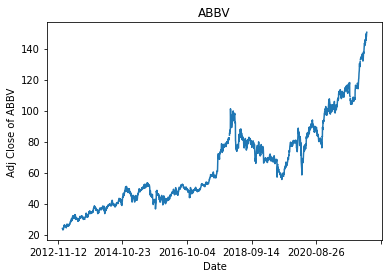

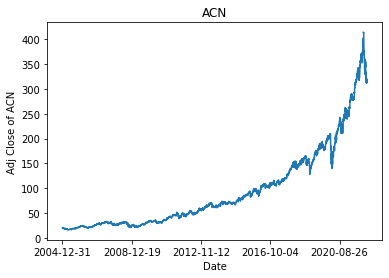

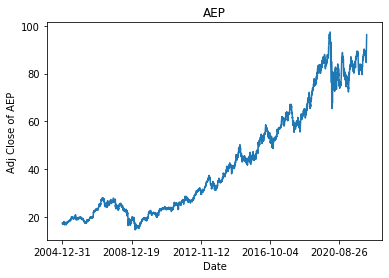

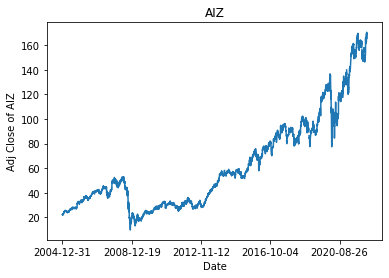

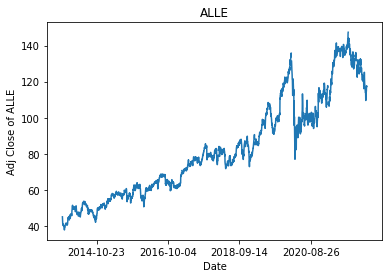

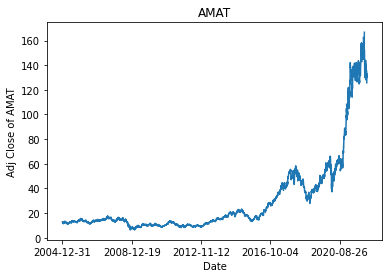

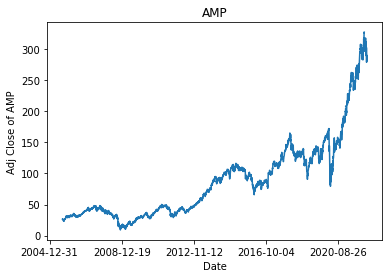

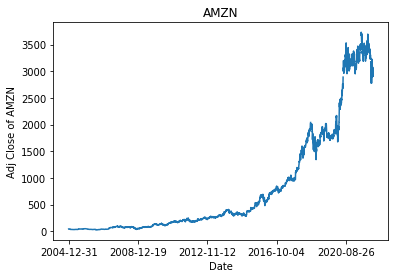

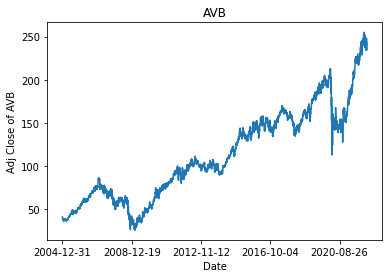

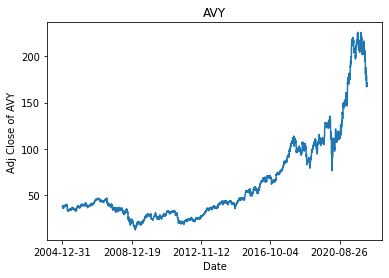

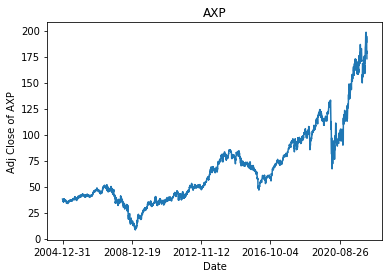

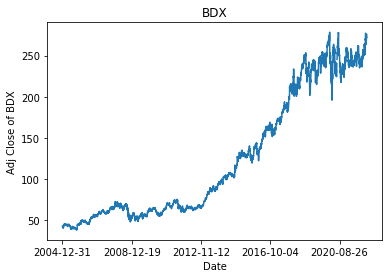

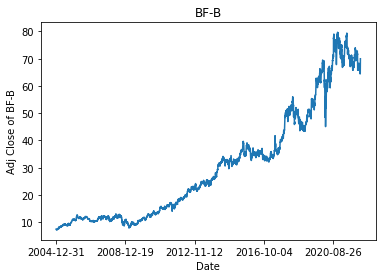

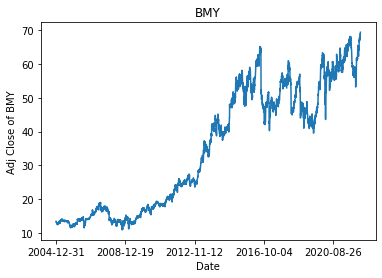

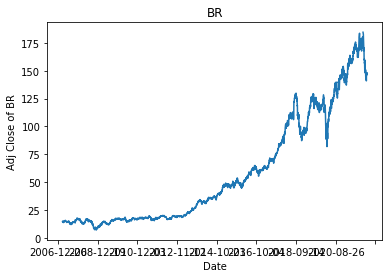

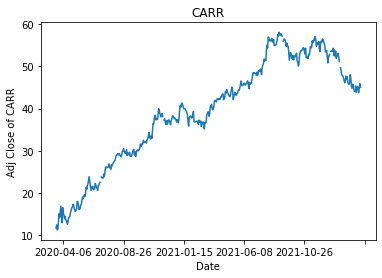

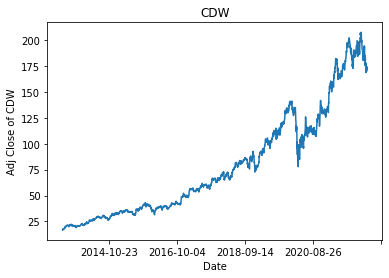

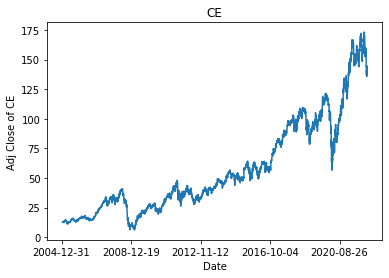

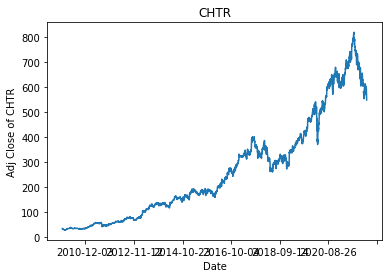

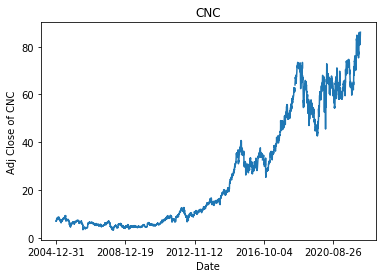

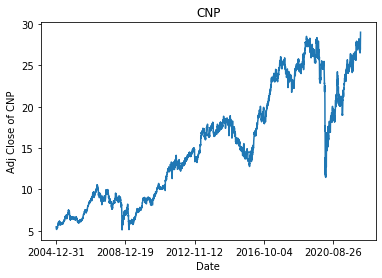

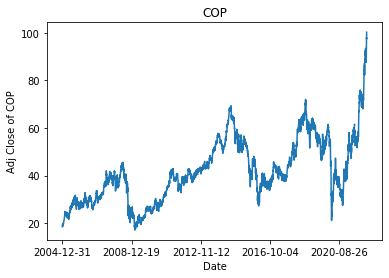

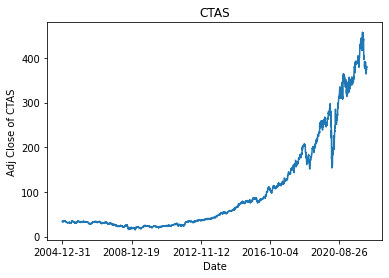

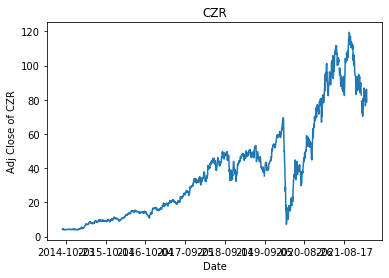

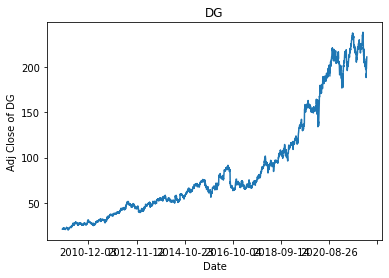

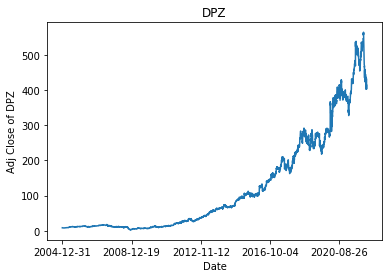

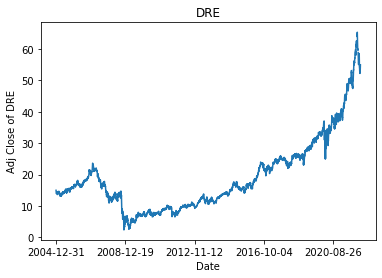

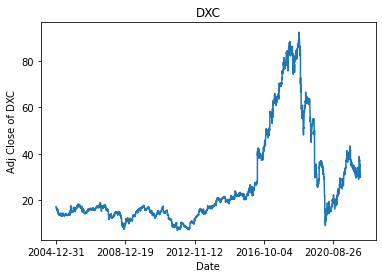

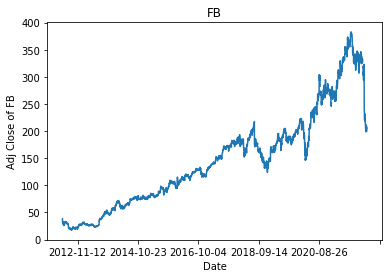

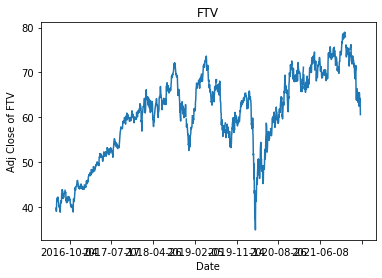

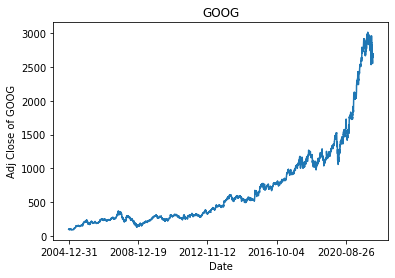

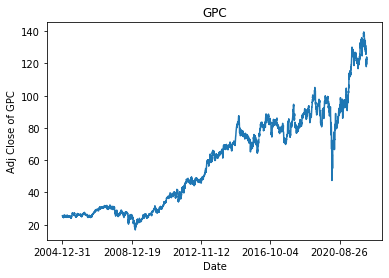

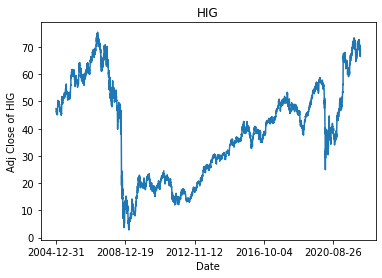

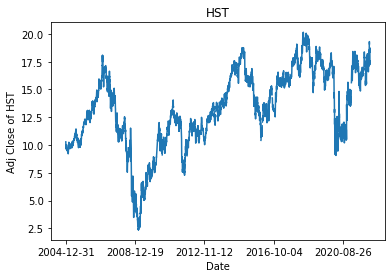

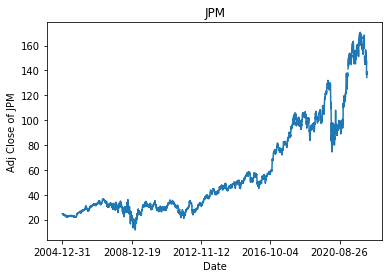

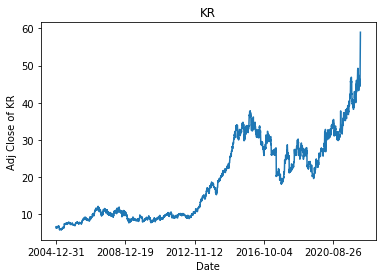

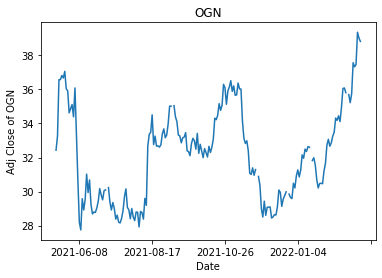

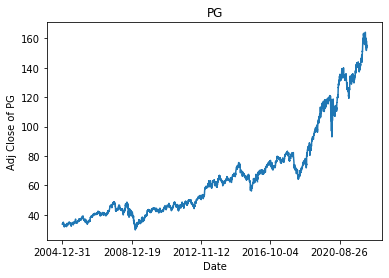

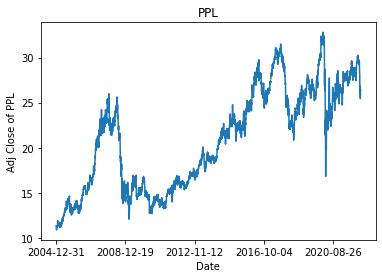

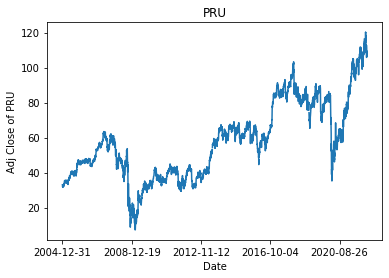

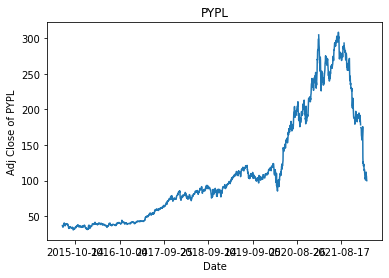

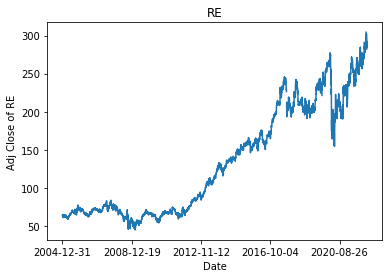

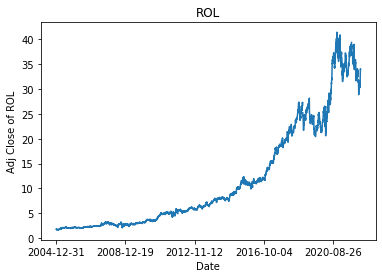

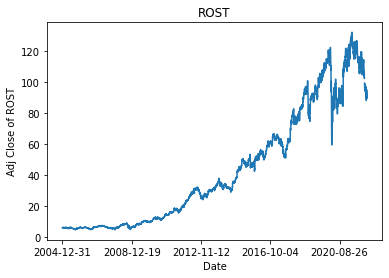

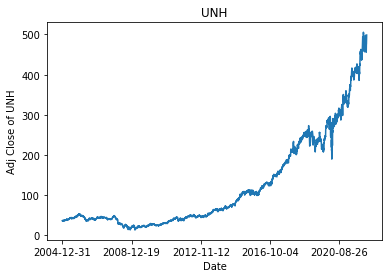

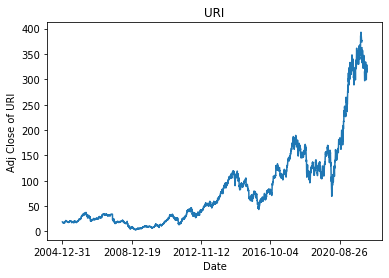

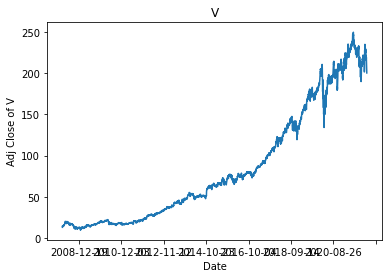

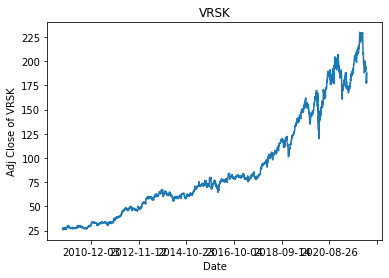

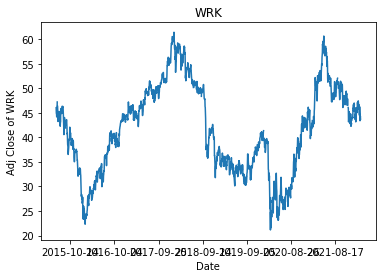

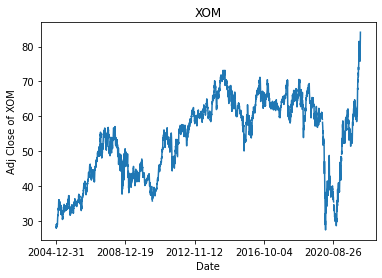

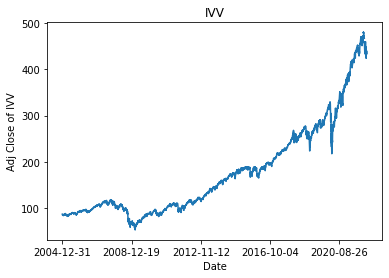

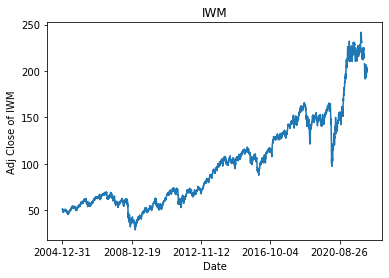

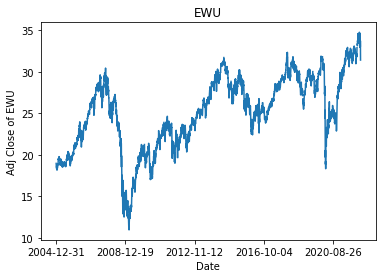

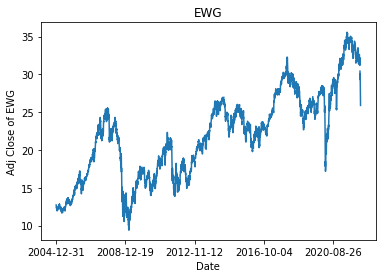

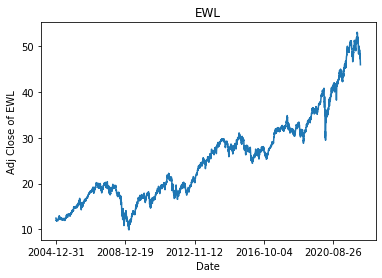

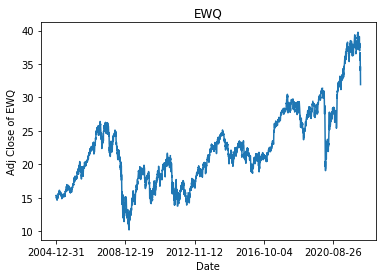

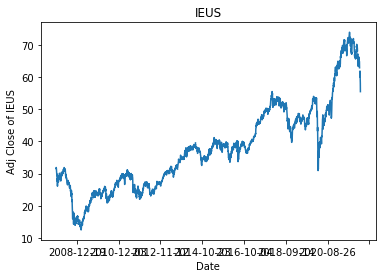

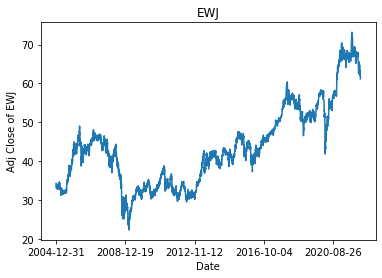

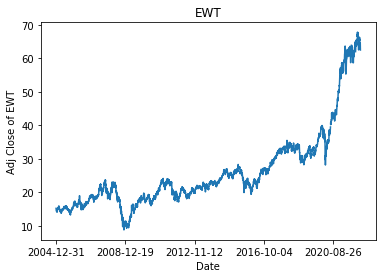

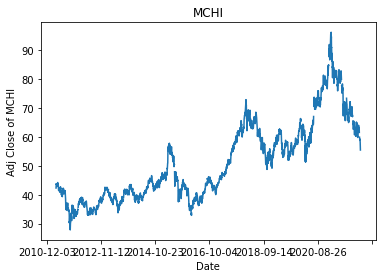

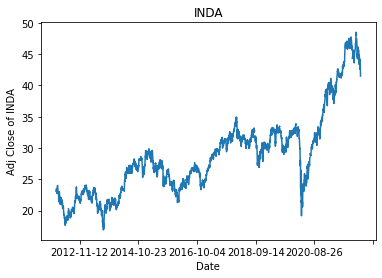

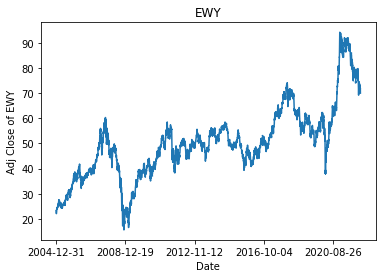

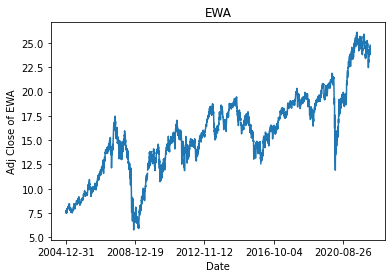

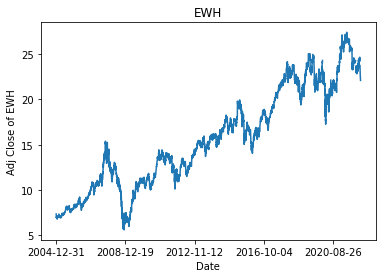

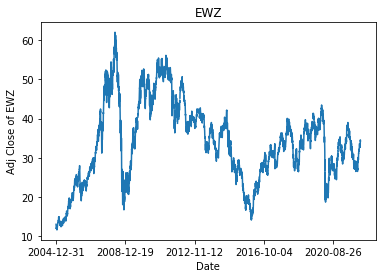

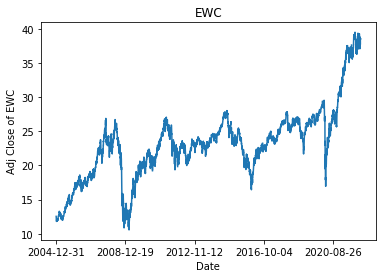

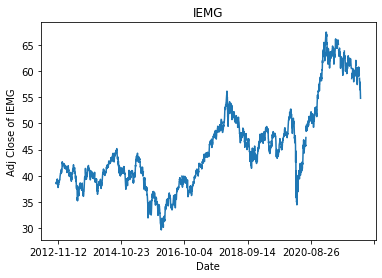

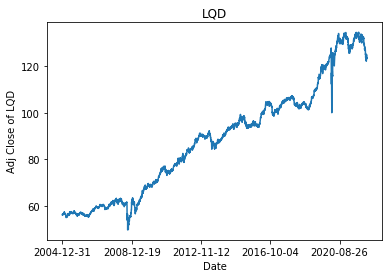

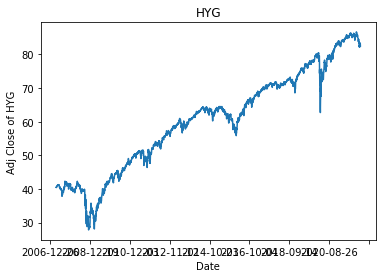

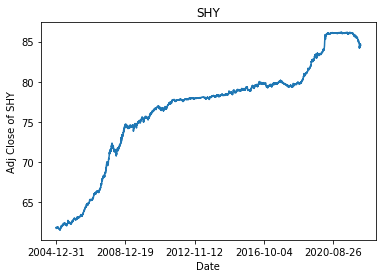

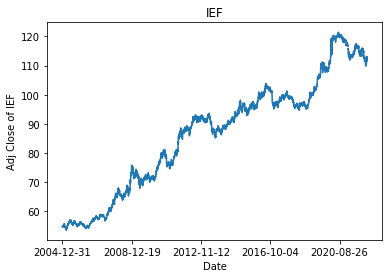

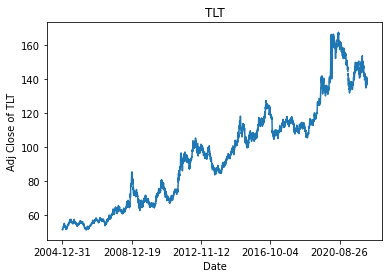

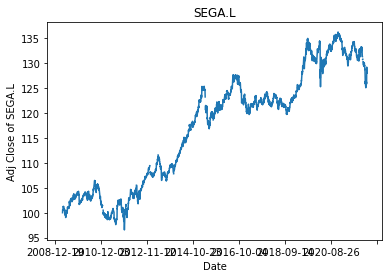

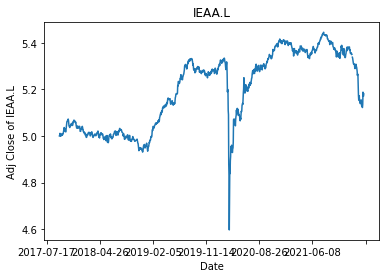

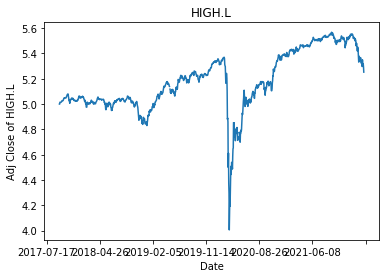

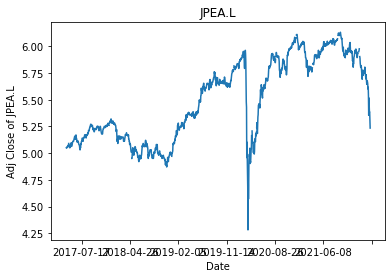

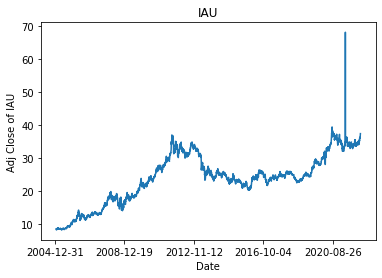

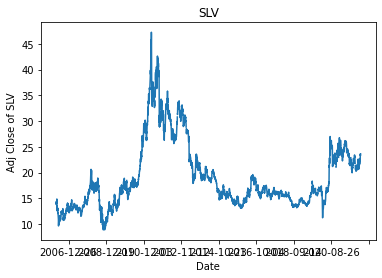

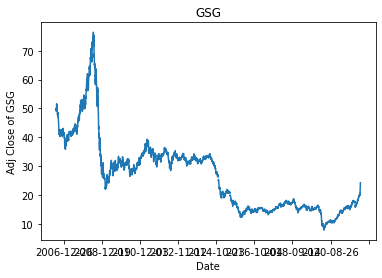

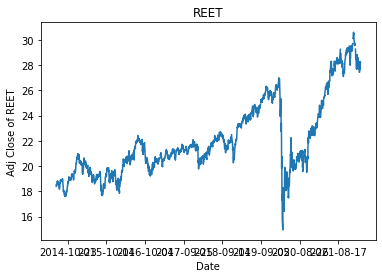

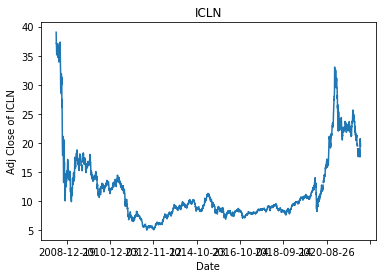

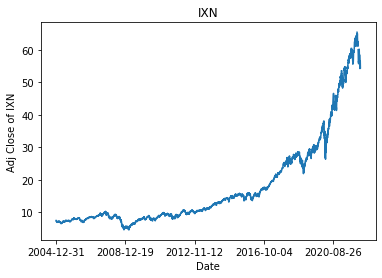

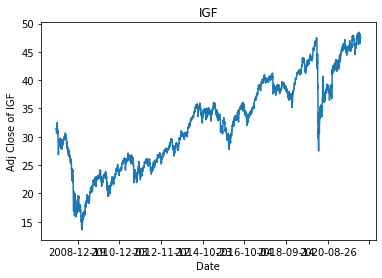

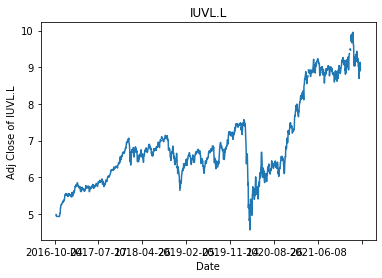

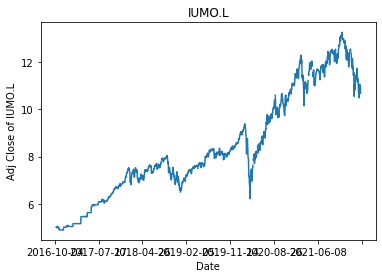

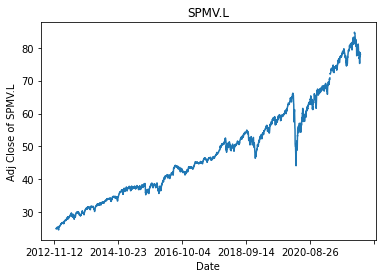

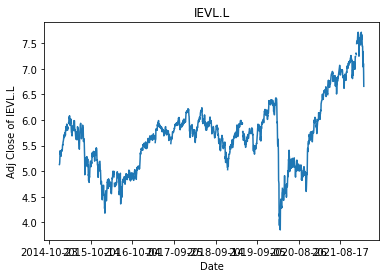

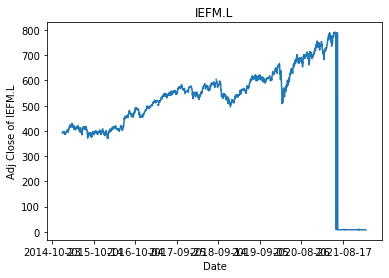

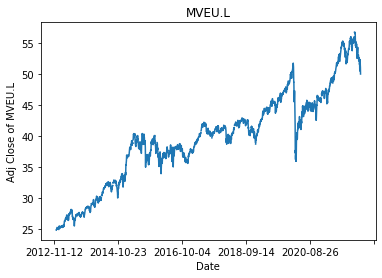

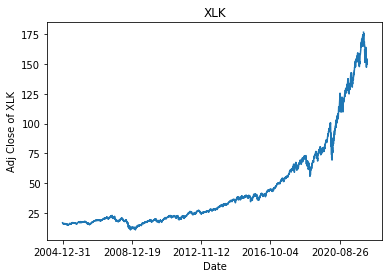

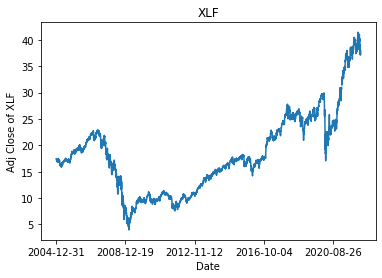

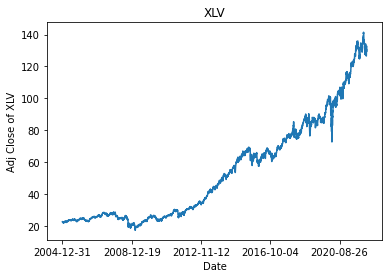

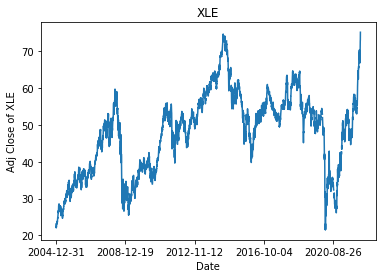

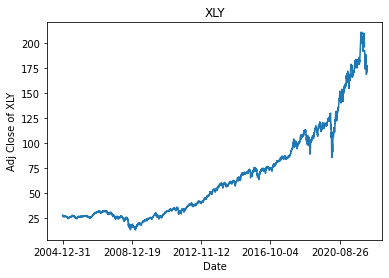

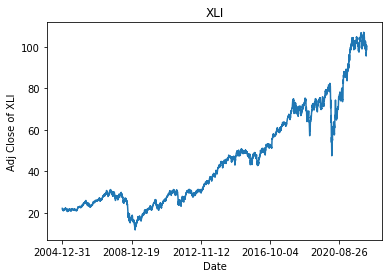

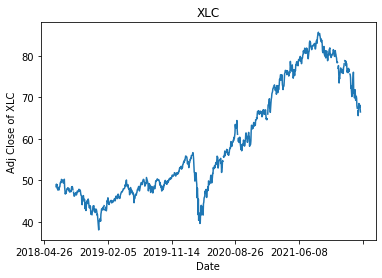

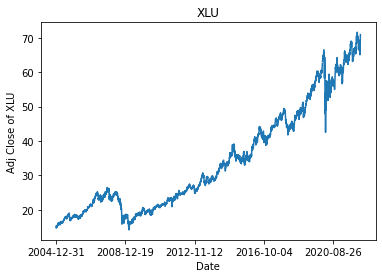

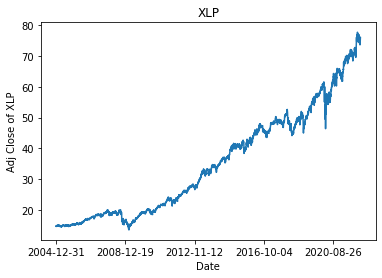

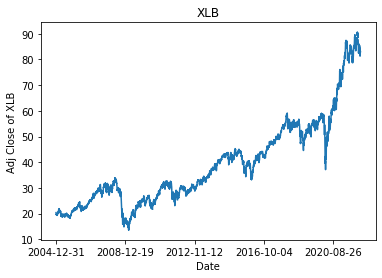

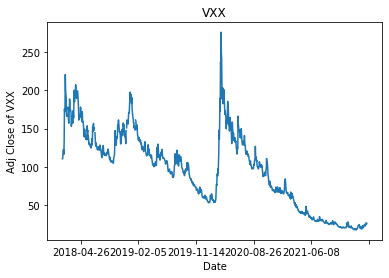

In [17]:
#strange IEFM.L spikes
for i in symbols:
    dat['Adj Close'][i].plot()
    plt.ylabel('Adj Close of ' + i)
    plt.title(i)
    plt.show()

<h3>Flat index for header</h3>

In [18]:
data = dat
data.columns = ["_".join(reversed(a)) for a in dat.columns.to_flat_index()]
dat.head()

,ABBV_Adj Close,ACN_Adj Close,AEP_Adj Close,AIZ_Adj Close,ALLE_Adj Close,AMAT_Adj Close,AMP_Adj Close,AMZN_Adj Close,AVB_Adj Close,AVY_Adj Close,AXP_Adj Close,BDX_Adj Close,BF-B_Adj Close,BMY_Adj Close,BR_Adj Close,CARR_Adj Close,CDW_Adj Close,CE_Adj Close,CHTR_Adj Close,CNC_Adj Close,CNP_Adj Close,COP_Adj Close,CTAS_Adj Close,CZR_Adj Close,DG_Adj Close,DPZ_Adj Close,DRE_Adj Close,DXC_Adj Close,EWA_Adj Close,EWC_Adj Close,EWG_Adj Close,EWH_Adj Close,EWJ_Adj Close,EWL_Adj Close,EWQ_Adj Close,EWT_Adj Close,EWU_Adj Close,EWY_Adj Close,EWZ_Adj Close,FB_Adj Close,FTV_Adj Close,GOOG_Adj Close,GPC_Adj Close,GSG_Adj Close,HIG_Adj Close,HIGH.L_Adj Close,HST_Adj Close,HYG_Adj Close,IAU_Adj Close,ICLN_Adj Close,IEAA.L_Adj Close,IEF_Adj Close,IEFM.L_Adj Close,IEMG_Adj Close,IEUS_Adj Close,IEVL.L_Adj Close,IGF_Adj Close,INDA_Adj Close,IUMO.L_Adj Close,IUVL.L_Adj Close,IVV_Adj Close,IWM_Adj Close,IXN_Adj Close,JPEA.L_Adj Close,JPM_Adj Close,KR_Adj Close,LQD_Adj Close,MCHI_Adj Close,MVEU.L_Adj Close,OGN_Adj Close,PG_Adj Close,PPL_Adj Close,PRU_Adj Close,PYPL_Adj Close,RE_Adj Close,REET_Adj Close,ROL_Adj Close,ROST_Adj Close,SEGA.L_Adj Close,SHY_Adj Close,SLV_Adj Close,SPMV.L_Adj Close,TLT_Adj Close,UNH_Adj Close,URI_Adj Close,V_Adj Close,VRSK_Adj Close,VXX_Adj Close,WRK_Adj Close,XLB_Adj Close,XLC_Adj Close,XLE_Adj Close,XLF_Adj Close,XLI_Adj Close,XLK_Adj Close,XLP_Adj Close,XLU_Adj Close,XLV_Adj Close,XLY_Adj Close,XOM_Adj Close,ABBV_Close,ACN_Close,AEP_Close,AIZ_Close,ALLE_Close,AMAT_Close,AMP_Close,AMZN_Close,AVB_Close,AVY_Close,AXP_Close,BDX_Close,BF-B_Close,BMY_Close,BR_Close,CARR_Close,CDW_Close,CE_Close,CHTR_Close,CNC_Close,CNP_Close,COP_Close,CTAS_Close,CZR_Close,DG_Close,DPZ_Close,DRE_Close,DXC_Close,EWA_Close,EWC_Close,EWG_Close,EWH_Close,EWJ_Close,EWL_Close,EWQ_Close,EWT_Close,EWU_Close,EWY_Close,EWZ_Close,FB_Close,FTV_Close,GOOG_Close,GPC_Close,GSG_Close,HIG_Close,HIGH.L_Close,HST_Close,HYG_Close,IAU_Close,ICLN_Close,IEAA.L_Close,IEF_Close,IEFM.L_Close,IEMG_Close,IEUS_Close,IEVL.L_Close,IGF_Close,INDA_Close,IUMO.L_Close,IUVL.L_Close,IVV_Close,IWM_Close,IXN_Close,JPEA.L_Close,JPM_Close,KR_Close,LQD_Close,MCHI_Close,MVEU.L_Close,OGN_Close,PG_Close,PPL_Close,PRU_Close,PYPL_Close,RE_Close,REET_Close,ROL_Close,ROST_Close,SEGA.L_Close,SHY_Close,SLV_Close,SPMV.L_Close,TLT_Close,UNH_Close,URI_Close,V_Close,VRSK_Close,VXX_Close,WRK_Close,XLB_Close,XLC_Close,XLE_Close,XLF_Close,XLI_Close,XLK_Close,XLP_Close,XLU_Close,XLV_Close,XLY_Close,XOM_Close,ABBV_Dividends,ACN_Dividends,AEP_Dividends,AIZ_Dividends,ALLE_Dividends,AMAT_Dividends,AMP_Dividends,AMZN_Dividends,AVB_Dividends,AVY_Dividends,AXP_Dividends,BDX_Dividends,BF-B_Dividends,BMY_Dividends,BR_Dividends,CARR_Dividends,CDW_Dividends,CE_Dividends,CHTR_Dividends,CNC_Dividends,CNP_Dividends,COP_Dividends,CTAS_Dividends,CZR_Dividends,DG_Dividends,DPZ_Dividends,DRE_Dividends,DXC_Dividends,EWA_Dividends,EWC_Dividends,EWG_Dividends,EWH_Dividends,EWJ_Dividends,EWL_Dividends,EWQ_Dividends,EWT_Dividends,EWU_Dividends,EWY_Dividends,EWZ_Dividends,FB_Dividends,FTV_Dividends,GOOG_Dividends,GPC_Dividends,GSG_Dividends,HIG_Dividends,HIGH.L_Dividends,HST_Dividends,HYG_Dividends,IAU_Dividends,ICLN_Dividends,...,IEAA.L_Open,IEF_Open,IEFM.L_Open,IEMG_Open,IEUS_Open,IEVL.L_Open,IGF_Open,INDA_Open,IUMO.L_Open,IUVL.L_Open,IVV_Open,IWM_Open,IXN_Open,JPEA.L_Open,JPM_Open,KR_Open,LQD_Open,MCHI_Open,MVEU.L_Open,OGN_Open,PG_Open,PPL_Open,PRU_Open,PYPL_Open,RE_Open,REET_Open,ROL_Open,ROST_Open,SEGA.L_Open,SHY_Open,SLV_Open,SPMV.L_Open,TLT_Open,UNH_Open,URI_Open,V_Open,VRSK_Open,VXX_Open,WRK_Open,XLB_Open,XLC_Open,XLE_Open,XLF_Open,XLI_Open,XLK_Open,XLP_Open,XLU_Open,XLV_Open,XLY_Open,XOM_Open,ABBV_Stock Splits,ACN_Stock Splits,AEP_Stock Splits,AIZ_Stock Splits,ALLE_Stock Splits,AMAT_Stock Splits,AMP_Stock Splits,AMZN_Stock Splits,AVB_Stock Splits,AVY_Stock Splits,AXP_Stock Splits,BDX_Stock Splits,BF-B_Stock Splits,BMY_Stock Splits,BR_Stock Splits,CARR_Stock Splits,CDW_Stock Splits,CE_Stock Splits,CHTR_Stock Splits,

In [19]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=data, title="Data Report", explorative=True)

In [ ]:
profile